# Capstone Project - Predicting Pet Adoption Outcome 

## Notebook 1 of 3

- **Notebook 1: Introduction, Data Cleaning, EDA and tabular feature engineering**
- Notebook 2: Text and Image Feature Engineering
- Notebook 3: Modelling

# Introduction

## Executive Summary

The purpose of this project is to use data science to help animal shelters get more pets adopted in a bid to tackle shelter overcrowding and reduce euthanasia rate for shelter animals. There are three goals for the project. Firstly, it is to identify the factors or characteristics that influences pet adoption outcomes. Secondly, it is to build a classifier model to predict a pet’s adoption outcome. Lastly, I will also create an image search function to allow potential adopters to search for similar looking pets. The analysis of the variables indicates that age and the number of photos has a strong correlation with the pets adoption outcome. Pure-breed pets and pets that have rarer characteristics tend to be adopted more quickly too (longer fur and golden/cream color). Using Sentence BERT and EfficientNet models, features were extracted in the form of text and image embeddings to use for modeling. The final best model, an LightGBM model taking in all features, produced a precision score of 0.616 and AUC-ROC of 0.767 on the test set, which was a significant improvement on the baseline model. Image search was finalized using JINA Now to create a web-app for a image-to-image neural search

## Problem Statement

Animal Shelters face the issue of shelter overcrowding and limited resources. The longer a pet remains in a shelter, the higher the risk of the pet being euthanized. The aim of this project is to help more pets get adopted. In order to do so, I will firstly examine what are some traits that influences pet adoption outcomes. Next, a classifier model will be created to predict whether pets will be adopted within a 100 days to help animal shelters identify the pets to allocate resources to. Lastly, an image search model will be developed to help adopters search for similar looking pets in the adoption listing.

## Goals

1. Findings on what influences pet adoption outcomes
- What are some features that make a pet more desirable and vice versa

2. Adoption Outcome Prediction
- Build a classifier model to predict pet adoption outcome for incoming pets

3. Image Search for pets
- Build an Image Search App to allow the searching of similar pets from the listing

## Background 

"Dogs and cats are domesticated animals who depend on humans to meet their needs for food, water, veterinary care, shelter, and safety and cannot survive for long on their own." [(source)](https://www.peta.org/issues/animal-companion-issues/overpopulation/)
Shelter overpopulation is a critical issue. The longer pets are housed in an animal shelter, the more likely they will be euthanized.  This problem has been excabated during the lockdowns over the world during the covid 19 pandemic. For instance, in Malaysia, the nationwide implementation of the Movement Control Order (MCO) heavily impacted adoption rates. [(source)](https://www.nst.com.my/news/nation/2020/04/582694/animal-shelters-running-out-space-food) 
In the US alone, over 6 million pets are put into animal shelters every year, of which roughly 3 million are cats and the other 3 million are dogs. Of these animals, approximately 1 million of them are euthanized every year. [(statistics)](https://www.aspca.org/helping-people-pets/shelter-intake-and-surrender/pet-statistics) 

The goal of this project is to identify some ways we can use Data Science or other technologies to help tackle this issue that occcurs all over the world. Digitisation has proven to be an effective way to help animal shelters. In one animal shelter in the USA, they managed to cut their operation cost \\$262,570 by successfully digitizing, reducing staffing requirements and streamline many processes. [(source)](https://tdwi.org/articles/2016/09/09/analytics-digital-records-pet-shelters.aspx) Throughout this project, we will analyse three specific methods that might be able to help animal shelters increase their adoption rate. Firstly, we can identify what influences adoption outcome to analyse if there are ways we can enhance a pet's profile to boost adoption. Animal shelters have limited resources and space.[(source)](https://www.sittingforacause.com/blog/adopt-dont-shop/3-problems-facing-animal-shelters/) These resources are usually derived from donations and volunteerism. The second task from this project is to develop a classification model to help predict if a pet will be adopted within a 100 days based on their characteristics and profile. Doing so will help animal shelters identify the pets that would require more resources in the form of marketing and adoption drive to increase their chances of adoption. This will hopefully result in animal shelters being able to manage their resources more effectively. The last component of the project will be to develop an image search function to allow for the searching of similar looking pets in the listing to help adopters search for similar looking pets in the adoption listing.

## Dataset

![PetFinder](logo.png)

For this project, I will be using a dataset comprising of pets from animal shelters all over Malaysia. The dataset comes from a pet adoption platfrom 'PetFinder Malaysia'. While the dataset here is localized to Malaysia, the results of this project would be transferrable to dataset for other countries with minor tweaking. The dataset contains information for the pet listed. This includes their profile picture, description summary as well as the pet's health, status and features.

[Petfinder Dataset Source](https://www.kaggle.com/competitions/petfinder-adoption-prediction/data)


In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# import tqdm to see progress bar for code
from tqdm import tqdm
tqdm.pandas()

sns.set_theme()
sns.set_style("dark")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# read data file
pets_df = pd.read_csv("data/petfinder.csv")

In [3]:
pets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13736 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

In [4]:
pets_df.loc[0, 'Description']

"Nibble is a 3+ month old ball of cuteness. He is energetic and playful. I rescued a couple of cats a few months ago but could not get them neutered in time as the clinic was fully scheduled. The result was this little kitty. I do not have enough space and funds to care for more cats in my household. Looking for responsible people to take over Nibble's care."

In [5]:
# Check for null values

pets_df.isnull().sum()

Type                0
Name             1257
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        12
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dtype: int64

There are null values in the description text column. We will look at those rows later on.

In [6]:
# Check for duplicates values

print(f"There are {pets_df.duplicated().sum()} duplicate rows")

There are 0 duplicate rows


Firstly, I will drop the ID and name columns except for the PetID which I will use as the identifier for each row when joining dataset.
- Name
- Rescuer ID

In [7]:
# Drop ID columns
pets_df = pets_df.drop(['Name', 'RescuerID'], axis=1)

In [8]:
pets_df.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


### Data Dictionary

| Name           | Type     | Description                                                                                                                                                                     |
|----------------|----------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| PetID          | Text     | The Unique hash identifier for the Pet listing                                                                                                                                  |
| Adoption Speed | Category | Value is determined by how quickly a pet is adopted if at all. (0 - 1 day 1 - 2-7 days (1 week) 2 - 8-30 days (1 month) 3 - 31-90 days (3 months) 4 - Not adopted after 100 days) |
| Type           | Category | Type of Animal                                                                                                                                                                  |
| Age            | Numeric  | The age of the pet in months                                                                                                                                                    |
| Breed 1        | Category | Primary Breed of the pet                                                                                                                                                        |
| Breed 2        | Category | Secondary Breed of the pet                                                                                                                                                      |
| Gender         | Category | Gender of the pet                                                                                                                                                               |
| Color1         | Category | Primary Color of Pet                                                                                                                                                            |
| Color2         | Category | Secondary Color of Pet                                                                                                                                                          |
| Color3         | Category | Third Color of Pet                                                                                                                                                              |
| MaturitySize   | Category | Size of pet at Maturity (1 - Small 2 - Medium 3 - Large 4 - Extra Large)                                                                                                          |
| FurLength      | Category | Fur Length (1 - Short 2 - Medium 3 - Long)                                                                                                                                        |
| Vaccinated     | Category | Vaccination Status of Pet (1 - Yes 2 - No 3 - Unsure)                                                                                                                           |
| Dewormed       | Category | Dewormed Status of Pet (1 - Yes 2 - No 3 - Unsure)                                                                                                                                |
| Sterilized     | Category | Sterilization Status of Pet (1 - Yes 2 - No 3 - Unsure)                                                                                                                           |
| Health         | Category | Health Status of Pet (1 - Healthy 2 - Minor Injury 3 - Serious Injury)                                                                                                            |
| Quantity       | Numeric  | Number of Pets in profile                                                                                                                                                       |
| Fee            | Numeric  | Adoption Fee Amount                                                                                                                                                             |
| State          | Category | State Location                                                                                                                                                                  |
| VideoAmt       | Numeric  | Total Uploaded Video for the pet                                                                                                                                                |
| PhotoAmt       | Numeric  | Total Uploaded Photos for the pet                                                                                                                                               |
| Description    | Text     | Profile Write-up for the pet                                                                                                                                                    |

# EDA and Data Cleaning

### Utility Functions for repetitive EDA task

Function to split dataset by a categorical feature - result is a dictionary with each key being a category and the value being the df

In [9]:
def split_df(df, cat_col):
    result = {}
    unique_cat_values = list(df[cat_col].unique())
    for val in unique_cat_values:
        result[val] = df[df[cat_col] == val]
    return result

In [10]:
def adoption_speed_by_cat(category, df):
    ax = sns.countplot(data=df, x='AdoptionSpeed', hue=category, palette=sns.color_palette("husl", 8))
    plt.title(f"Adoption Speed and {category}")

In [11]:
def adoption_outcome_by_cat(category, df):
    ax = sns.countplot(data=df, x=category, hue='NotAdopted', palette=sns.color_palette("husl", 8))
    plt.title(f"Adoption Outcome and {category}")

In [12]:
def adoption_rate_avg(category, df=pets_df):
    grpby_mean = df.groupby(category).mean()['NotAdopted']
    ax =sns.barplot(y=grpby_mean.values, x=grpby_mean.index, palette=sns.color_palette("husl", 8))
    plt.title(f"Percentage Not Adopted and {category}")

In [13]:
def multi_adoption_outcome(cat_split, cat_analyse, fig_size=(10,8)):
    '''
    cat_split: The category to split the dataframe into smaller sets of df
    cat_analyse: The category to plot against adoption speed
    '''
    df_split = split_df(pets_df, cat_split)

    fig, axes = plt.subplots(1, len(df_split), figsize=(15, 5), sharey=True)
    fig.suptitle(f'Adoption Outcome')

    for i, key in enumerate(df_split.keys()):
        sns.countplot(data=df_split[key], x='NotAdopted', hue=cat_analyse, ax=axes[i], palette=sns.color_palette("husl", 8))
        axes[i].set_title(f"Adoption Outcome and {cat_analyse} for {key}")

## Tabular data

### Adoption Speed

From the dataset given, the adoption speed is classified under 5 categories. The value is determined by how quickly, if at all, a pet is adopted.

0 - Pet was adopted on the same day as it was listed.

1 - Pet was adopted between 1 and 7 days (1st week) after being listed.

2 - Pet was adopted between 8 and 30 days (1st month) after being listed.

3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.

4 - No adoption after 100 days of being listed

In [14]:
pets_df['AdoptionSpeed'].value_counts()

4    4197
2    4037
3    3259
1    3090
0     410
Name: AdoptionSpeed, dtype: int64

In [15]:
pets_df['AdoptionSpeed'].value_counts(normalize=True)

4    0.279931
2    0.269259
3    0.217368
1    0.206096
0    0.027346
Name: AdoptionSpeed, dtype: float64

There are 4197 pets (27%) that do not get adopted. 

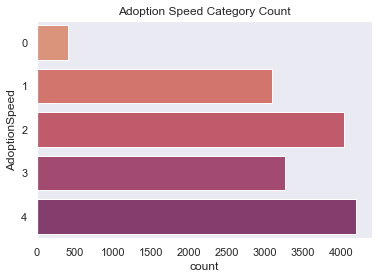

In [16]:
sns.countplot(y=pets_df['AdoptionSpeed'], palette=sns.color_palette("flare"))
plt.title("Adoption Speed Category Count")
plt.show()

Findings:

Most pets belong to category 4 (27%) which means they are likely not adopted at all. Hopefully, with our analysis, we can identify ways to help these pets.

### Adoption Outcome

For this problem, since the goal of our analysis is to identify the pet's adoption outcome to find out which pets to allocate resources to, our target variable will be whether the pet gets adopted within a 100 days or not (if at all). This can be derived from whether the adoption speed takes on a value of 4. 

Using the adoption speed column we will create our Target variable - adoption outcome.

In [17]:
# Create Target Variable
pets_df['NotAdopted'] = pets_df['AdoptionSpeed'].apply(lambda x: 1 if x==4 else 0)

In [18]:
pets_df['NotAdopted'].value_counts()

0    10796
1     4197
Name: NotAdopted, dtype: int64

In [19]:
pets_df['NotAdopted'].value_counts(normalize=True)

0    0.720069
1    0.279931
Name: NotAdopted, dtype: float64

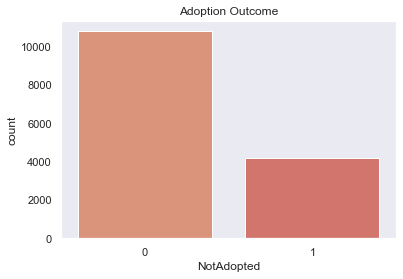

In [20]:
sns.countplot(x=pets_df['NotAdopted'], palette=sns.color_palette("flare"))
plt.title("Adoption Outcome")
plt.show()

### Type

The Type column denotes the type of pet - a cat or a dog
- 1: Dog
- 2: Cat

In [21]:
# Unique Pet types
pets_df['Type'].unique()

array([2, 1], dtype=int64)

In [22]:
# Replace number to pet type name

pets_df['Type'] = pets_df['Type'].apply(lambda x: 'dog' if x == 1 else 'cat')

In [23]:
# get count of each type of pet
pets_df['Type'].value_counts(normalize=True)

dog    0.542386
cat    0.457614
Name: Type, dtype: float64

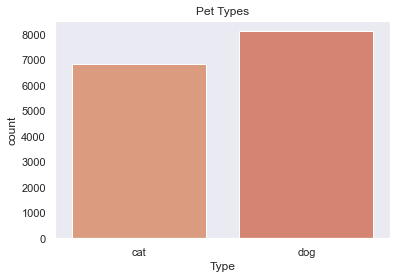

In [24]:
sns.countplot(x=pets_df['Type'], palette=sns.color_palette("flare", 8))
plt.title("Pet Types")
plt.show()

There are more dogs in the dataset as compared to cats.

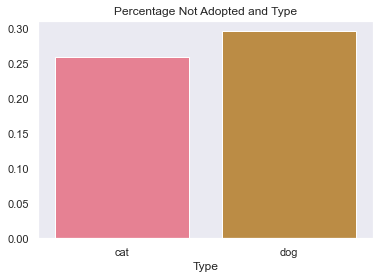

In [25]:
adoption_rate_avg('Type')
plt.show()

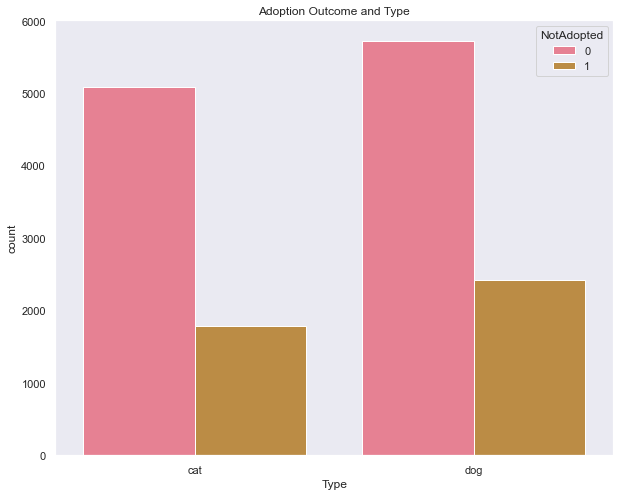

In [26]:
plt.figure(figsize=(10,8))
adoption_outcome_by_cat('Type', pets_df)
plt.show()

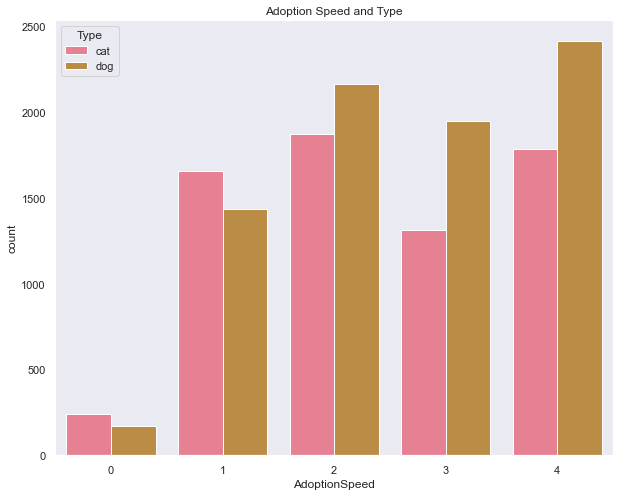

In [27]:
plt.figure(figsize=(10,8))
adoption_speed_by_cat('Type', pets_df)
plt.show()

Cats have a faster adoption speed than dogs. Majority of the cats are adopted within a week and a month. Dogs have a slightly higher chance of not being adopted (about 30%).

### Age

The 'Age' column indicates how old the pet is in months

In [28]:
# Unique Pet types
pets_df['Age'].value_counts().head(10)

2     3503
1     2304
3     1966
4     1109
12     967
24     651
5      595
6      558
36     417
8      309
Name: Age, dtype: int64

In [29]:
pets_df['Age'].describe()

count    14993.000000
mean        10.452078
std         18.155790
min          0.000000
25%          2.000000
50%          3.000000
75%         12.000000
max        255.000000
Name: Age, dtype: float64

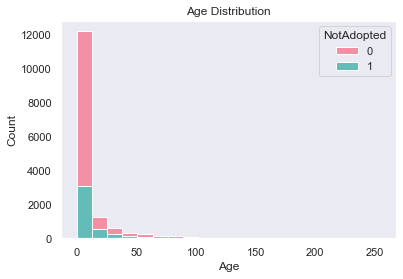

In [30]:
sns.histplot(data=pets_df, x='Age', hue='NotAdopted', bins=20, multiple='stack', palette=sns.color_palette("husl", 2))
plt.title("Age Distribution")
plt.show()

Most pets listed are less than a year old and many of them are only a few months old. One interesting pattern is that ages in multiples of 12 are more prominent, which could mean many people give the pet age in years. Younger pets tend to have a higher adoption rate as well.

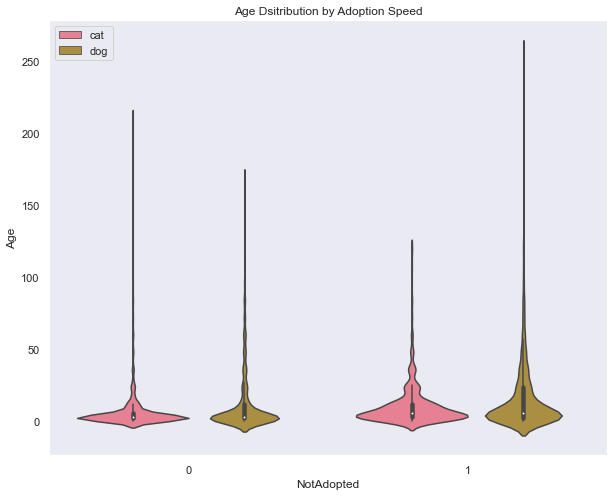

In [31]:
plt.figure(figsize=(10,8))
sns.violinplot(data=pets_df, y='Age', x='NotAdopted', hue='Type', palette=sns.color_palette("husl"))
plt.legend(loc='upper left')
plt.title('Age Dsitribution by Adoption Speed')
plt.show()

In [32]:
pets_df.groupby('NotAdopted').describe()['Age'].T

NotAdopted,0,1
count,10796.000000,4197.000000
mean,9.201927,13.667858
std,17.145163,20.177460
min,0.000000,0.000000
25%,2.000000,3.000000
50%,3.000000,6.000000
75%,7.000000,15.000000
max,212.000000,255.000000


- It seems like there is some relation between age and adoption outcome. Younger pets tend to have a higher adoption rate.
- Most pets listed are very young (4 mths or less)

### Breed

There are two columns relating the Breed - Breed1 and Breed 2

Breed1 - Primary Breed

Breed2 - Secondary Breed

The breed is labeled with an ID in our dataset with the corresponding breed name in the BreedLabels.csv file. I will firstly derive the breed name from the breed label file

In [33]:
breed_label = pd.read_csv("data/BreedLabels.csv")

In [34]:
breed_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   BreedID    307 non-null    int64 
 1   Type       307 non-null    int64 
 2   BreedName  307 non-null    object
dtypes: int64(2), object(1)
memory usage: 7.3+ KB


In [35]:
breed_label.head()

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita


In [36]:
# get a dictionary of breed name with the ID as the keys

breed_dict = {}
for breed_id, name in zip(breed_label['BreedID'], breed_label['BreedName']):
    breed_dict[breed_id] = name

In [37]:
pets_df['Breed1'].value_counts().head()

307    5927
266    3634
265    1258
299     342
264     296
Name: Breed1, dtype: int64

In [38]:
pets_df['Breed2'].value_counts().head()

0      10762
307     1727
266      599
265      321
299      138
Name: Breed2, dtype: int64

Most values in the secondary breed are 0 (which means there is no secondary breed), followed by 307 which represents mixed breed. We will drop the secondary breed column as many of the pets are already labelled as mixed breed in the primary breed column but some of the rows have label in two columns.

In [39]:
# Drop breed 2 column
pets_df = pets_df.drop('Breed2', axis=1)

In [40]:
pets_df['BreedName'] = pets_df['Breed1'].map(breed_dict)

In [41]:
# Check for null
pets_df['BreedName'].isnull().sum()

5

In [42]:
# null rows
pets_df[pets_df['BreedName'].isnull()]

,Type,Age,Breed1,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,NotAdopted,BreedName
391,dog,2,0,2,2,0,0,2,1,1,1,2,1,1,0,41326,0,Milo went missing after a week with her new ad...,375905770,3.0,3,0,NaN
1045,dog,4,0,2,2,3,0,2,1,1,1,2,1,1,100,41326,0,"She's only 4 months old, very friendly and lov...",da8d4a273,5.0,4,1,NaN
3219,cat,3,0,3,1,4,7,1,1,2,1,2,1,3,0,41401,0,Mama cat came to house and gave birth to these...,27e74e45c,11.0,2,0,NaN
7285,dog,72,0,1,1,2,0,2,2,2,2,2,1,1,0,41326,0,He is a stray dog found wandering around Unive...,7b5bee232,5.0,4,1,NaN
7706,dog,2,0,2,2,5,7,1,1,2,2,2,1,1,1,41336,0,I want to adopt a newborn puppy Prefer small b...,0327b8e94,0.0,3,0,NaN


There are 5 rows with unknown breeds. We will replace the columns for dog with 'Mixed Breed' which is usually the case for unknown dog breeds anyway and 'domestic' for cats.

In [43]:
# replace null with mixed breed/domestic
pets_df.loc[(pets_df['BreedName'].isnull()) & (pets_df['Type']=='cat'), 'BreedName'] = 'Domestic Short Hair'
pets_df.loc[(pets_df['BreedName'].isnull()) & (pets_df['Type']=='dog'), 'BreedName'] = 'Mixed Breed'

In [44]:
# Get Breed name colum
print(f"There are {pets_df['BreedName'].nunique()} unique breeds")

There are 175 unique breeds


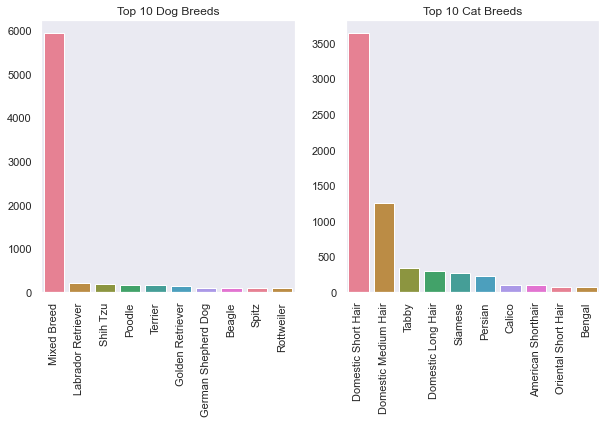

In [45]:
# Most common breeds

top_10_breeds_dog = pets_df[pets_df['Type']=='dog']['BreedName'].value_counts().head(10)
top_10_breeds_cat = pets_df[pets_df['Type']=='cat']['BreedName'].value_counts().head(10)

fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.barplot(x=top_10_breeds_dog.index, y=top_10_breeds_dog.values, palette=sns.color_palette("husl", 8), ax=axes[0])
axes[0].set_xticklabels(top_10_breeds_dog.index, rotation=90)
axes[0].set_title("Top 10 Dog Breeds")

sns.barplot(x=top_10_breeds_cat.index, y=top_10_breeds_cat.values, palette=sns.color_palette("husl", 8), ax=axes[1])
axes[1].set_xticklabels(top_10_breeds_cat.index, rotation=90)
axes[1].set_title("Top 10 Cat Breeds")

plt.show()

In [46]:
# Drop breed ID column since we have the breed name

pets_df = pets_df.drop('Breed1', axis=1)

Majority of the dog breeds are mixed breed can majority of the cats are domestic. These are typical labels for breeds that are unknown, which is common among stray animals. I will compare the mixed breed/domestic breed with the pets of pure breed

In [47]:
# create list of mixed breed names
mixed_breed = ['Mixed Breed', 'Domestic Short Hair', 'Domestic Medium Hair', 'Domestic Long Hair']

In [48]:
# create new column to denote if breed is mixed breed (unknown/local stray breed)

pets_df['mixed_breed'] = pets_df['BreedName'].apply(lambda x: 1 if x in mixed_breed else 0)

In [49]:
pets_df['mixed_breed'].value_counts()

1    11120
0     3873
Name: mixed_breed, dtype: int64

In [50]:
pets_df['mixed_breed'].value_counts(normalize=True)

1    0.741679
0    0.258321
Name: mixed_breed, dtype: float64

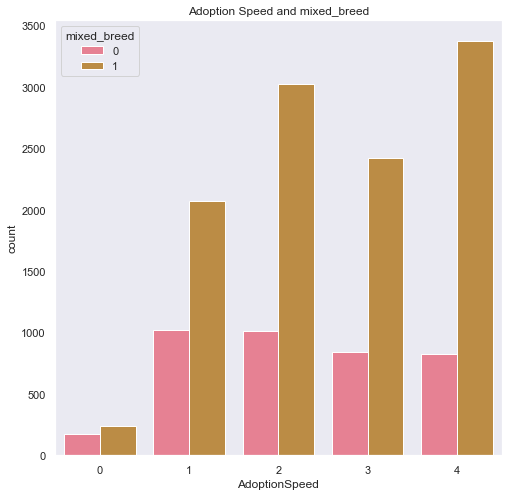

In [51]:
plt.figure(figsize=(8,8))
adoption_speed_by_cat('mixed_breed', df=pets_df)
plt.show()

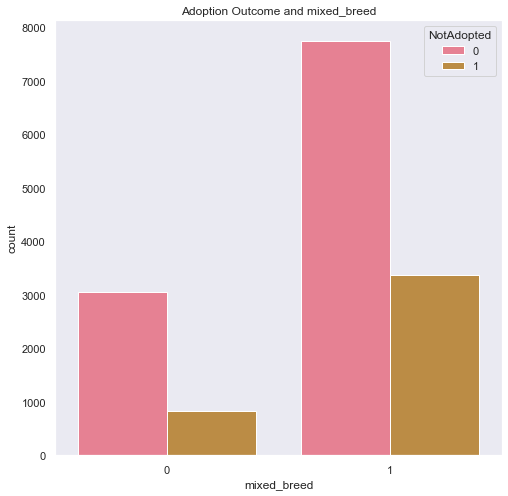

In [52]:
plt.figure(figsize=(8,8))
adoption_outcome_by_cat('mixed_breed', df=pets_df)
plt.show()

In [53]:
pets_df.groupby('mixed_breed').mean()['NotAdopted']

mixed_breed
0    0.212755
1    0.303327
Name: NotAdopted, dtype: float64

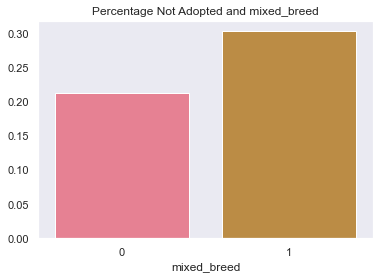

In [54]:
adoption_rate_avg('mixed_breed', df=pets_df)

Pure breed pets are more likely to get adopted (21% are not adopted) compared to mixed/domestic breed pets (30% are not adopted)

### Gender

Gender of pet 
- 1 = Male
- 2 = Female
- 3 = Mixed - group of pets

In [55]:
# replace labels with gender names

pets_df['Gender'] = pets_df['Gender'].map({1: "male", 2: 'female', 3:'mixed'})

In [56]:
pets_df['Gender'].value_counts(normalize=True)

female    0.485360
male      0.369239
mixed     0.145401
Name: Gender, dtype: float64

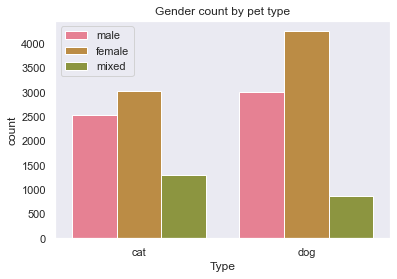

In [57]:
sns.countplot(data=pets_df, x='Type', hue='Gender', palette=sns.color_palette("husl", 8))
plt.title("Gender count by pet type")
plt.legend(loc='upper left')
plt.show()

There are more female pets than male pets in the dataset in general. For dogs, there are significantly more females

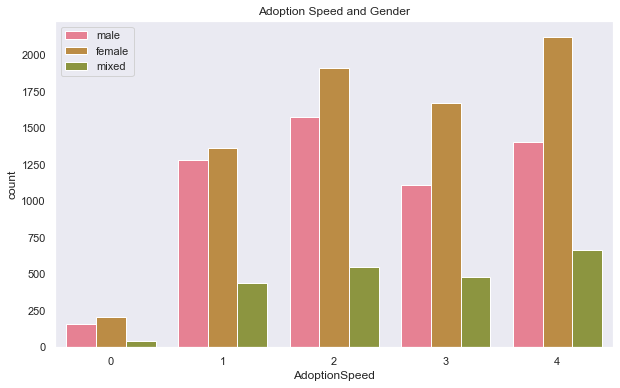

In [58]:
plt.figure(figsize=(10,6))
adoption_speed_by_cat('Gender', df=pets_df)
plt.legend(loc='upper left')
plt.show()

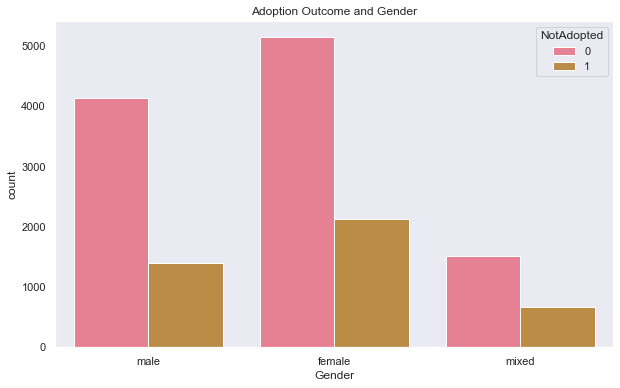

In [59]:
plt.figure(figsize=(10,6))
adoption_outcome_by_cat('Gender', df=pets_df)
plt.show()

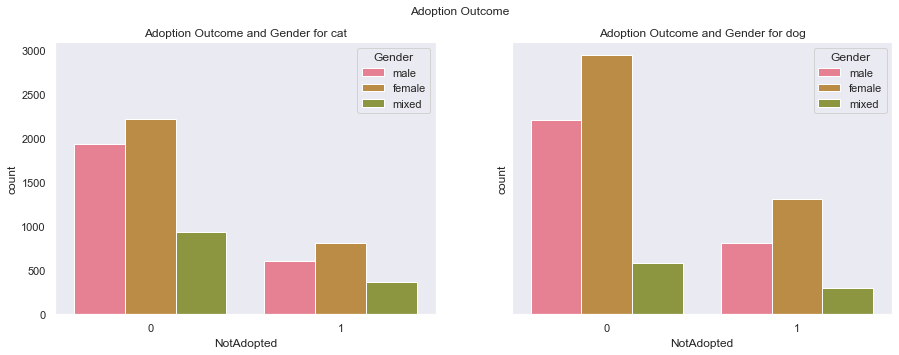

In [60]:
multi_adoption_outcome('Type', 'Gender')
plt.show()

In [61]:
pets_df.groupby('Gender').mean()['NotAdopted']

Gender
female    0.292016
male      0.253974
mixed     0.305505
Name: NotAdopted, dtype: float64

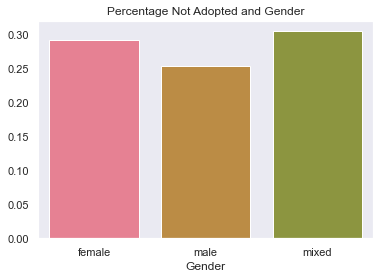

In [62]:
adoption_rate_avg('Gender', pets_df)
plt.show()

It seems like male pets (25% not adopted) have a slightly higher adoption rate as compared to female pets (29% adopted). The mixed gender category has highest percentage of pets not being adopted - this could indicate that not knowing the pet's gender or having multiple pets in the listing negatively impacts their adoption outcome.

### Color

There are three colours that are listed
- Color 1
- Color 2
- Color 3

The colours are denoted by a numerical label and the actual colors are in the csv file - 'ColorLabels.csv'

In [63]:
# Frequency Table for color columns
for col in ['Color1', 'Color2', 'Color3']:
    print(pets_df[col].value_counts())

1    7427
2    3750
3     947
5     884
6     684
7     667
4     634
Name: Color1, dtype: int64
0    4471
7    3438
2    3313
5    1128
6    1063
4     870
3     710
Name: Color2, dtype: int64
0    10604
7     3221
5      417
6      378
4      198
3      175
Name: Color3, dtype: int64


Majority of the rows in color 3 are 0. For the column 'Color2', majority of the rows are 0 as well but there are more columns with value. Instead of concatenating all three columns to get every color combination, I will create a separate column to identify if the pet is multi-coloured.

In [64]:
color = pd.read_csv('data/ColorLabels.csv')

In [65]:
# get a dictionary of color name with the ID as the keys

color_dict = {}
for color_id, name in zip(color['ColorID'], color['ColorName']):
    color_dict[color_id] = name

In [66]:
# Replace ColorId with the Color name
pets_df['Color1'] = pets_df['Color1'].map(color_dict)
pets_df['Color2'] = pets_df['Color2'].map(color_dict)

In [67]:
# new column to indicate if pet is multi-coloured

pets_df['multi_color'] = pets_df['Color2'].apply(lambda x: 1 if x in color_dict.values() else 0)

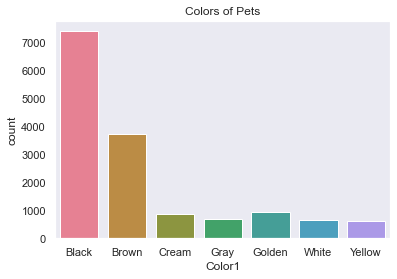

In [68]:
sns.countplot(data=pets_df, x='Color1', palette=sns.color_palette("husl", 8))
plt.title('Colors of Pets')
plt.show()

Majority of the pets are black or brown in color

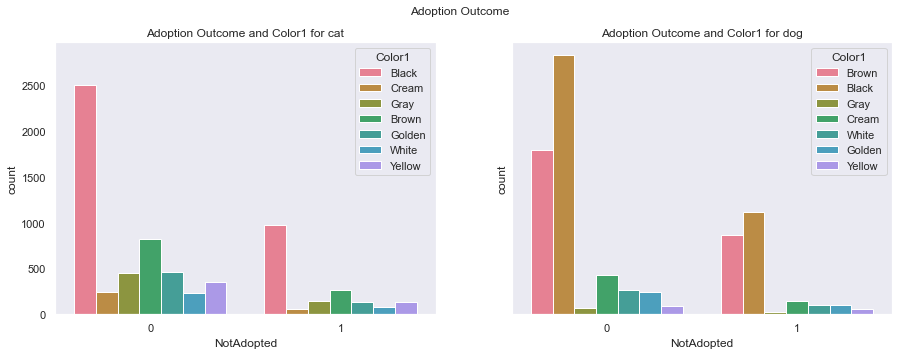

In [69]:
multi_adoption_outcome('Type', 'Color1')
plt.show()

In [70]:
pets_df.groupby('Color1').mean()['NotAdopted']

Color1
Black     0.281002
Brown     0.301867
Cream     0.234163
Golden    0.251320
Gray      0.250000
White     0.256372
Yellow    0.301262
Name: NotAdopted, dtype: float64

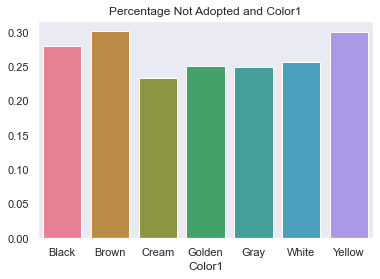

In [71]:
adoption_rate_avg('Color1', pets_df)

Brown and Yellow pets have the worst adoption rate. Colors that are less common seem to have a higher adoption rate such as Golden adn Cream. However, Yellow seems to be the exception.

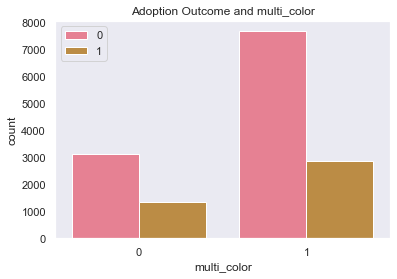

In [72]:
adoption_outcome_by_cat('multi_color', pets_df)
plt.legend(loc='upper left')
plt.show()

In [73]:
pets_df.groupby('multi_color').mean()['NotAdopted']

multi_color
0    0.301051
1    0.270956
Name: NotAdopted, dtype: float64

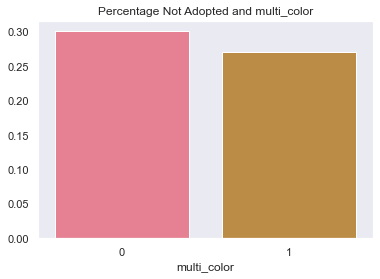

In [74]:
adoption_rate_avg('multi_color', pets_df)

- The most common colors are black and brown.
- There seem to be some differences in adoption outcome by the color - brown and yellow pets have the worst adoption rate
- Multicolored pets seem to have a slightly better adoption rate

In [75]:
# Drop other color columns
pets_df = pets_df.drop(['Color2', 'Color3'], axis=1)

### Maturity Size

- 1 = Small
- 2 = Medium
- 3 = Large
- 4 = Extra Large

In [76]:
# size count
pets_df['MaturitySize'].value_counts()

2    10305
1     3395
3     1260
4       33
Name: MaturitySize, dtype: int64

We will categorise the extra large pets together with large due to the small sample in the dataset

In [77]:
pets_df['MaturitySize'] = pets_df['MaturitySize'].apply(lambda x: 3 if x == 4 else x)

In [78]:
# size count
pets_df['MaturitySize'].value_counts()

2    10305
1     3395
3     1293
Name: MaturitySize, dtype: int64

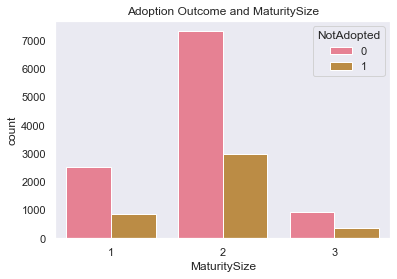

In [79]:
adoption_outcome_by_cat('MaturitySize', pets_df)

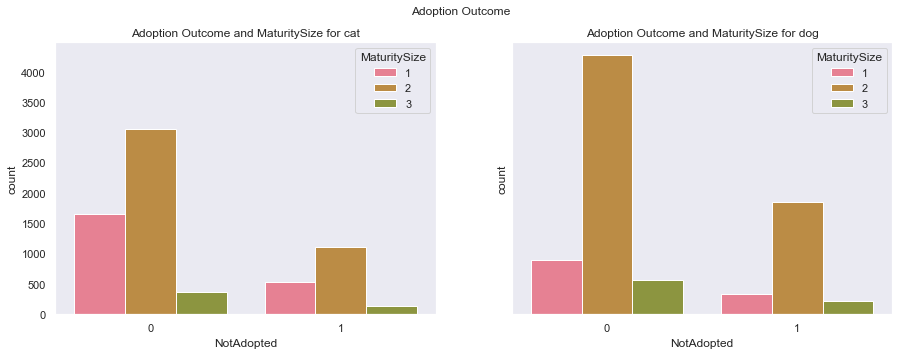

In [80]:
multi_adoption_outcome('Type', 'MaturitySize')
plt.show()

Similar pattern for dogs and cats

In [81]:
pets_df.groupby('MaturitySize').mean()['NotAdopted']

MaturitySize
1    0.253608
2    0.288501
3    0.280742
Name: NotAdopted, dtype: float64

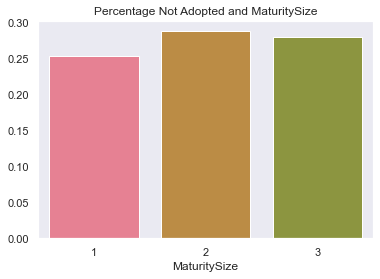

In [82]:
adoption_rate_avg('MaturitySize', pets_df)

- Medium size pets have the worst adoption rate (29% not adopted) while small pets have the best (25% not adopted)

### FurLength

- 1 = Short 
- 2 = Medium
- 3 = Long

In [83]:
pets_df['FurLength'].value_counts()

1    8808
2    5361
3     824
Name: FurLength, dtype: int64

Text(0.5, 1.0, 'Count of pets by fur length')

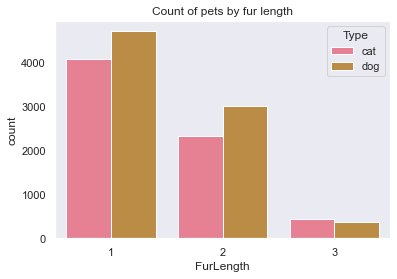

In [84]:
sns.countplot(data=pets_df, x='FurLength', hue='Type', palette=sns.color_palette("husl", 8))
plt.title("Count of pets by fur length")

Most pets have short hair. Very few pets have long fur

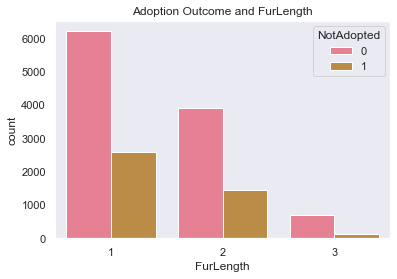

In [85]:
adoption_outcome_by_cat('FurLength', pets_df)

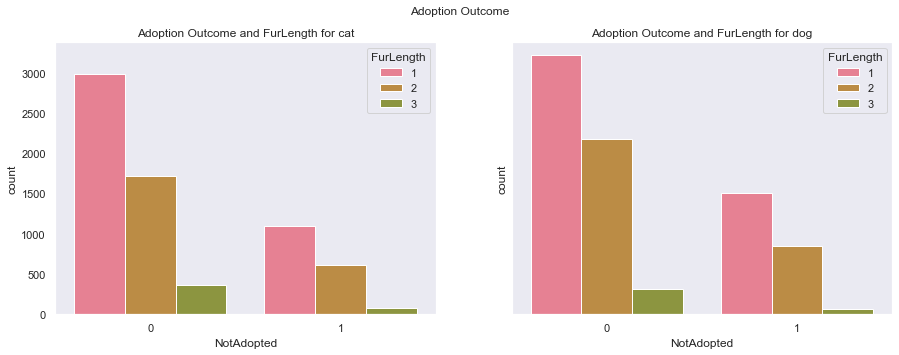

In [86]:
multi_adoption_outcome('Type', 'FurLength')
plt.show()

In [87]:
pets_df.groupby('FurLength').mean()['NotAdopted']

FurLength
1    0.295073
2    0.272151
3    0.168689
Name: NotAdopted, dtype: float64

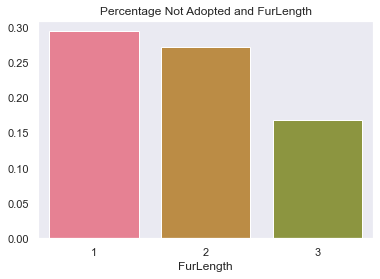

In [88]:
adoption_rate_avg('FurLength', pets_df)

- Pets with long fur have the highest adoption rate (16% not adopted) while pets with shorter fur have the lowest adoption rate (30% not adopted)
- Having longer fur seem to be favourable

### Vaccinated

- 1 = Yes
- 2 = No
- 3 = Not Sure

In [89]:
pets_df['Vaccinated'].value_counts()

2    7227
1    5898
3    1868
Name: Vaccinated, dtype: int64

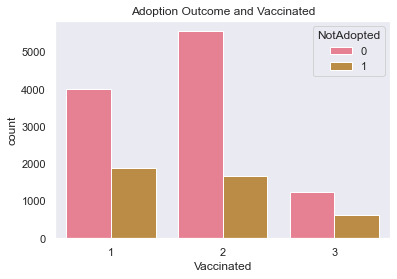

In [90]:
adoption_outcome_by_cat('Vaccinated', pets_df)
plt.show()

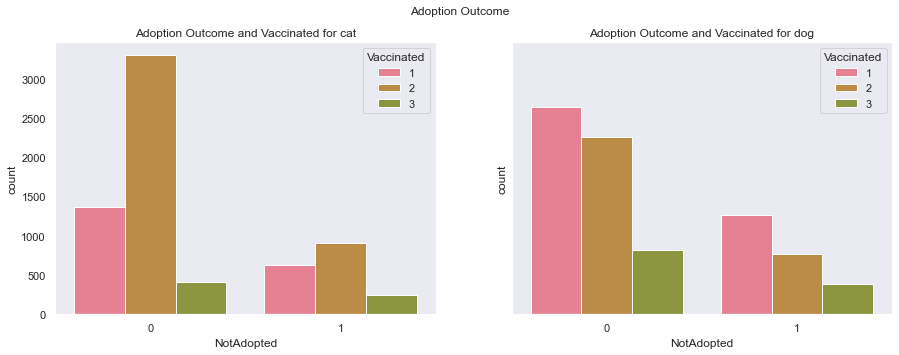

In [91]:
multi_adoption_outcome('Type', 'Vaccinated')
plt.show()

In [92]:
pets_df.groupby('Vaccinated').mean()['NotAdopted']

Vaccinated
1    0.321295
2    0.231493
3    0.336724
Name: NotAdopted, dtype: float64

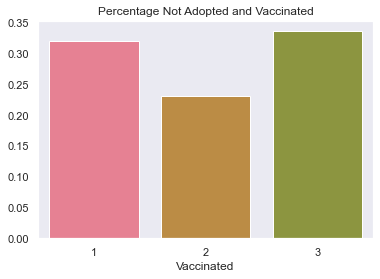

In [93]:
adoption_rate_avg('Vaccinated', pets_df)

- More cats then to be vaccinated compared to dogs
- One odd observation is that unvaccinated pets have better adoption rate (23% not adopted) compared to vaccinated pets (32% not adopted) - perhaps owners want to get vaccination themselves
- Not having information about vaccination also seems to negatively impact adoption rate

### Dewormed

- 1 = Yes
- 2 = No
- 3 = Not Sure

In [94]:
pets_df['Dewormed'].value_counts()

1    8397
2    4815
3    1781
Name: Dewormed, dtype: int64

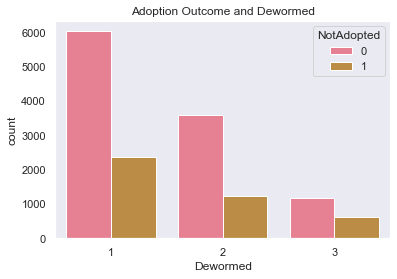

In [95]:
adoption_outcome_by_cat('Dewormed', pets_df)
plt.show()

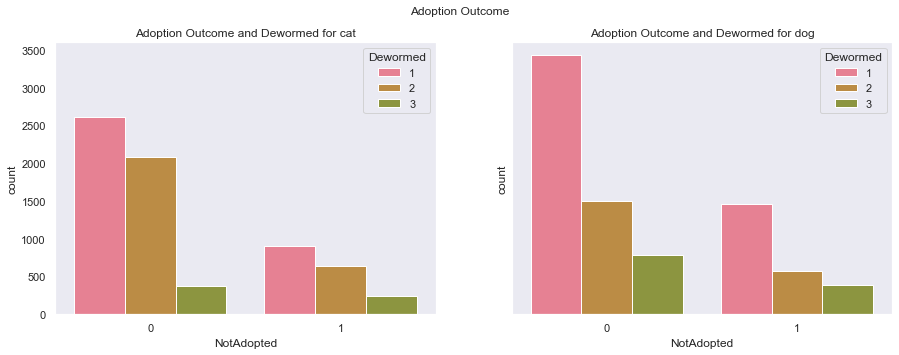

In [96]:
multi_adoption_outcome('Type', 'Dewormed')
plt.show()

In [97]:
pets_df.groupby('Dewormed').mean()['NotAdopted']

Dewormed
1    0.280934
2    0.253375
3    0.346996
Name: NotAdopted, dtype: float64

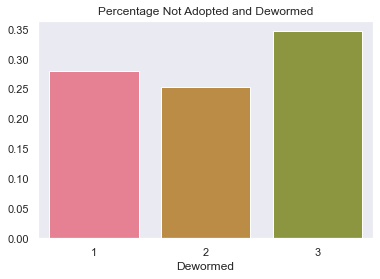

In [98]:
adoption_rate_avg('Dewormed', pets_df)

- More cats are dewormed
- Again, an odd observation where the average adoption rate is better for non-dewormed pets (25% not adopted) compared to dewormed pets (28% not adopted)
- Not having information negatively impacts adoption outcome (35% not adopted)

### Sterilized

- 1 = Yes
- 2 = No
- 3 = Not Sure

In [99]:
pets_df['Sterilized'].value_counts()

2    10077
1     3101
3     1815
Name: Sterilized, dtype: int64

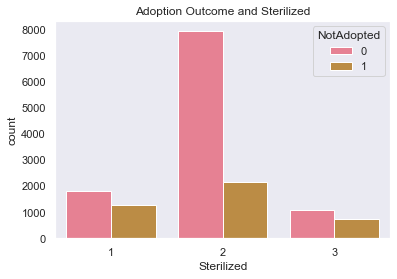

In [100]:
adoption_outcome_by_cat('Sterilized', pets_df)
plt.show()

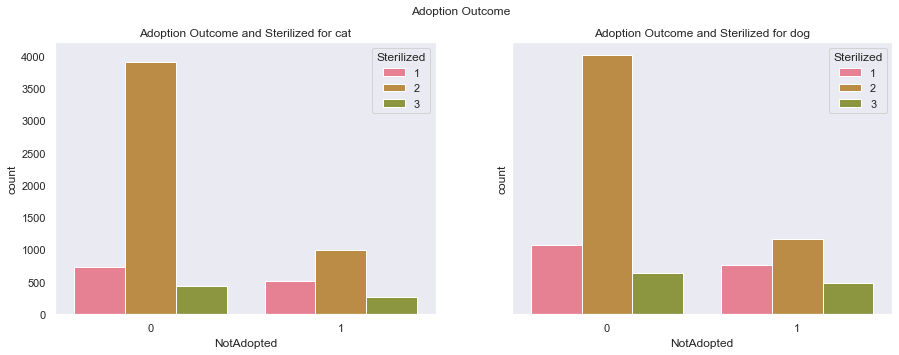

In [101]:
multi_adoption_outcome('Type', 'Sterilized')
plt.show()

In [102]:
pets_df.groupby('Sterilized').mean()['NotAdopted']

Sterilized
1    0.416317
2    0.213953
3    0.413223
Name: NotAdopted, dtype: float64

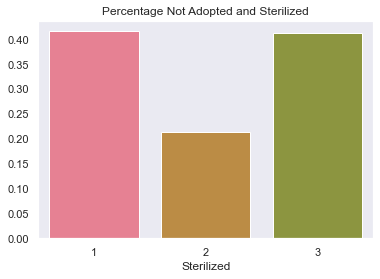

In [103]:
adoption_rate_avg('Sterilized', pets_df)

- We observed a similar pattern again - people prefer unsterilized pets (21% adopted) compared to sterilized pets (41% not adopted)
- Not having information negatively impacts adoption outcome (41% not adopted)

### Health

- 1 = Healthy
- 2 = Minor Injury
- 3 = Serious Injury

In [104]:
pets_df['Health'].value_counts()

1    14478
2      481
3       34
Name: Health, dtype: int64

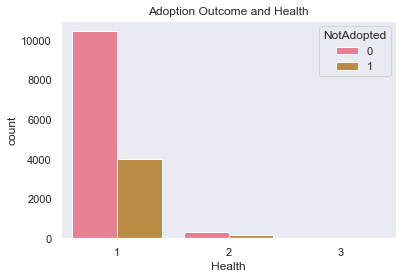

In [105]:
adoption_outcome_by_cat('Health', pets_df)
plt.show()

In [106]:
pets_df.groupby('Health').mean()['NotAdopted']

Health
1    0.277110
2    0.355509
3    0.411765
Name: NotAdopted, dtype: float64

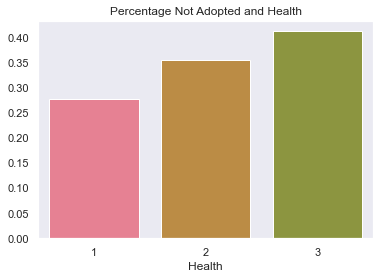

In [107]:
adoption_rate_avg('Health', pets_df)

- Most pets are healthy!
- Adoption rates becomes worse as health deteriorates. Healthy pets have 28% unadopted while for pets with serious injury, 41% are not adopted 

### Quantity of pets

In [108]:
pets_df['Quantity'].value_counts()

1     11565
2      1422
3       726
4       531
5       333
6       185
7        84
8        52
9        33
10       19
20       12
11       10
12        6
15        4
17        3
16        3
14        2
13        2
18        1
Name: Quantity, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='Quantity'>

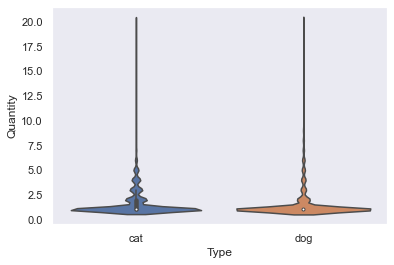

In [109]:
sns.violinplot(data=pets_df, x='Type', y='Quantity')

In [110]:
pets_df['Quantity'].describe()

count    14993.000000
mean         1.576069
std          1.472477
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         20.000000
Name: Quantity, dtype: float64

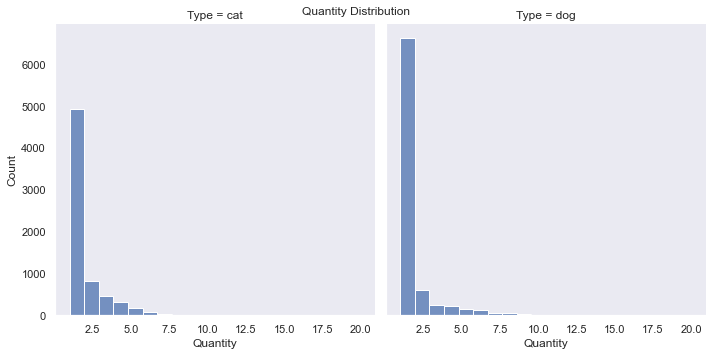

In [111]:
sns.displot(data=pets_df, x='Quantity', col='Type', bins=20)
plt.suptitle("Quantity Distribution")
plt.show()

In [112]:
pets_df.groupby('Quantity').mean()['NotAdopted']

Quantity
1     0.266321
2     0.300985
3     0.301653
4     0.350282
5     0.387387
6     0.356757
7     0.357143
8     0.307692
9     0.272727
10    0.578947
11    0.600000
12    0.333333
13    0.500000
14    1.000000
15    0.500000
16    0.333333
17    0.000000
18    1.000000
20    0.666667
Name: NotAdopted, dtype: float64

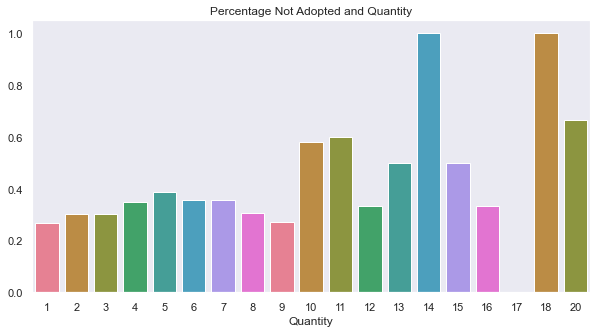

In [113]:
plt.figure(figsize=(10,5))
adoption_rate_avg('Quantity', pets_df)
plt.show()

- Most listings have only a single pet
- Some evidence that adoption rate gets worse as the quantity increases

### Fee

In [114]:
pets_df['Fee'].describe()

count    14993.000000
mean        21.259988
std         78.414548
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3000.000000
Name: Fee, dtype: float64

In [115]:
pets_df['Fee'].value_counts().head()

0      12663
50       468
100      408
200      219
150      162
Name: Fee, dtype: int64

I will categorise the fee into three category
- no fee
- small fee
- high fee

In [116]:
def fee_categorisation(fee):
    if fee == 0:
        return 0
    elif fee < 500:
        return 1
    else:
        return 2

In [117]:
pets_df['FeeAsked'] = pets_df['Fee'].apply(fee_categorisation)

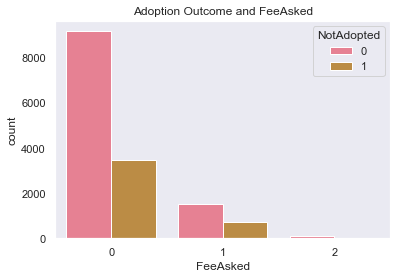

In [118]:
adoption_outcome_by_cat('FeeAsked', pets_df)
plt.show()

In [119]:
pets_df.groupby('FeeAsked').mean()['NotAdopted']

FeeAsked
0    0.274501
1    0.314350
2    0.200000
Name: NotAdopted, dtype: float64

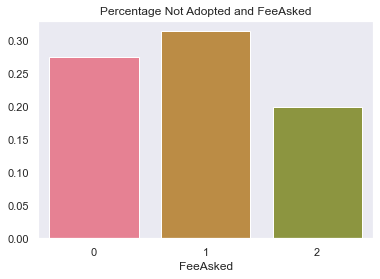

In [120]:
adoption_rate_avg('FeeAsked', pets_df)

- When there is a high fee, pets are adopted faster, perhaps people are more inclined to pay for 'better' pets
- A small fee tends to make the pet less desirable

### State

State names are in csv file 'StateLabels.csv'

In [121]:
state_name = pd.read_csv('data/StateLabels.csv')

In [122]:
# get a dictionary of state name with the ID as the keys

state_dict = {}
for state_id, name in zip(state_name['StateID'], state_name['StateName']):
    state_dict[state_id] = name

In [123]:
# Replace StateID with the Color name
pets_df['State'] = pets_df['State'].map(state_dict)

In [124]:
pets_df['State'].value_counts().head()

Selangor        8714
Kuala Lumpur    3845
Pulau Pinang     843
Johor            507
Perak            420
Name: State, dtype: int64

In [125]:
pets_df.groupby('State').mean()['NotAdopted']

State
Johor              0.260355
Kedah              0.327273
Kelantan           0.400000
Kuala Lumpur       0.310013
Labuan             0.333333
Melaka             0.583942
Negeri Sembilan    0.426877
Pahang             0.270588
Perak              0.335714
Pulau Pinang       0.355872
Sabah              0.363636
Sarawak            0.692308
Selangor           0.246959
Terengganu         0.346154
Name: NotAdopted, dtype: float64

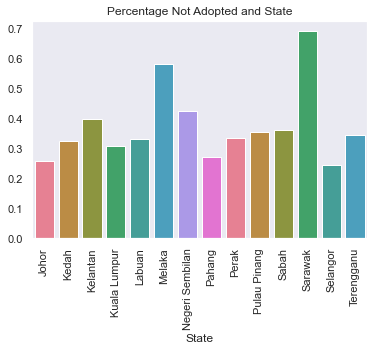

In [126]:
adoption_rate_avg('State', pets_df)
plt.xticks(rotation=90)
plt.show()

The top states by count (Selangor, Johor and Kuala Lumpur) seem to have a faster adoption speed in general.

### VideoAmt

In [127]:
pets_df['VideoAmt'].value_counts()

0    14419
1      417
2       92
3       36
4       15
5        7
6        4
8        2
7        1
Name: VideoAmt, dtype: int64

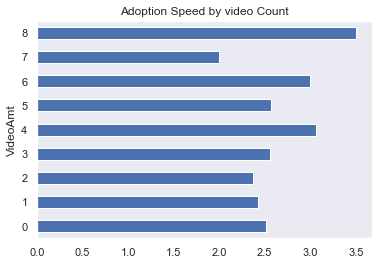

In [128]:
pets_df.groupby(['VideoAmt']).mean()['AdoptionSpeed'].plot(kind='barh')
plt.title('Adoption Speed by video Count')
plt.show()

- Most profiles have no videos, there is a huge imbalance in the dataset here
- there does not seem to be a any pattern as well
- we can consider dropping this column

In [129]:
pets_df = pets_df.drop('VideoAmt', axis=1)

### PhotoAmt

<AxesSubplot:xlabel='PhotoAmt', ylabel='Count'>

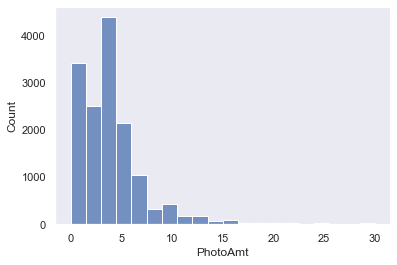

In [130]:
sns.histplot(pets_df['PhotoAmt'], bins=20)

We will group 10 or more photos together due to the decreasing amount of data for those with many pictures

In [131]:
pets_df['PhotoAmt'] = pets_df['PhotoAmt'].apply(lambda x: 10 if x>10 else x)

In [132]:
pets_df['PhotoAmt'].value_counts()

1.0     3075
2.0     2518
3.0     2511
5.0     2147
4.0     1881
10.0     922
6.0      621
7.0      432
0.0      341
8.0      314
9.0      231
Name: PhotoAmt, dtype: int64

In [133]:
pets_df.groupby('PhotoAmt').mean()['NotAdopted']

PhotoAmt
0.0     0.624633
1.0     0.328455
2.0     0.298253
3.0     0.287535
4.0     0.260500
5.0     0.253843
6.0     0.217391
7.0     0.148148
8.0     0.184713
9.0     0.138528
10.0    0.191974
Name: NotAdopted, dtype: float64

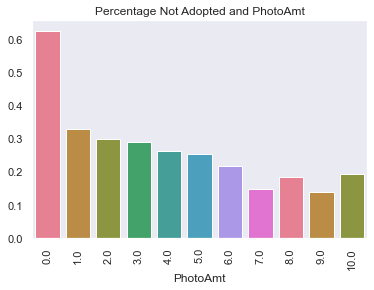

In [134]:
adoption_rate_avg('PhotoAmt', pets_df)
plt.xticks(rotation=90)
plt.show()

- Pets with no photo have a worse adoption rate (62% not adopted)
- A higher number of photo tend to lead to better adoption rate

In [135]:
# New column to indicate if there is a photo
pets_df['photo'] = pets_df['PhotoAmt'].apply(lambda x: 1 if x>0 else 0)

## Text Data

In [136]:
# Import library for text
import re
import emoji
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### Clean Text

With the intention to use a BERT model to get the embeddings, I will perform a light cleaning on the description column

1. Replace null with a space
2. Remove any URL
3. Demojize
5. remove Symbols

In [137]:
# Fill null rows with spaces

pets_df['Description'].fillna(' ', inplace=True)
pets_df['Description'].isnull().sum()

0

In [138]:
# remove URL
pets_df['Description'] = pets_df['Description'].map(lambda x: re.sub(r"http\S+", '', x))

In [139]:
# Demojize
pets_df['Description'] = pets_df['Description'].apply(lambda x: emoji.demojize(x))

In [140]:
# remove symbols except hypens and apostrophe in words
pets_df['Description'] = pets_df['Description'].apply(lambda x: re.sub(r"\b([-'])\b|[\W_]", ' ', x))

In [141]:
# remove multiple spaces
pets_df['Description'] = pets_df['Description'].apply(lambda x: re.sub(r' +', ' ', x))

### Description Length

In [142]:
# Create column for description length
pets_df['desc_length'] = pets_df['Description'].apply(len)

# Create column for word cout
pets_df['desc_word_count'] = pets_df['Description'].apply(lambda x: len(x.split()))

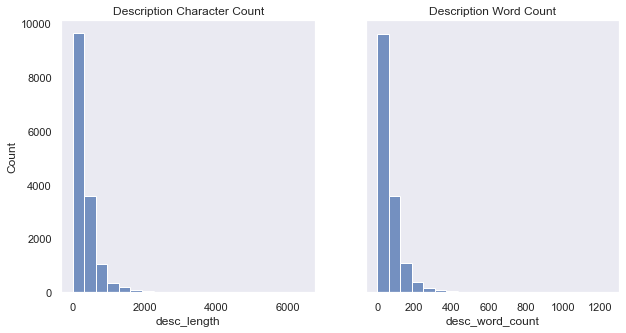

In [143]:
fig, axes = plt.subplots(1,2, figsize=(10,5), sharey=True)
sns.histplot(data=pets_df, x='desc_length', bins=20, ax=axes[0])
axes[0].set_title('Description Character Count')
sns.histplot(data=pets_df, x='desc_word_count', bins=20, ax=axes[1])
axes[1].set_title('Description Word Count')
plt.show()

Most Description are less than a 1000 characters and less than 100 words

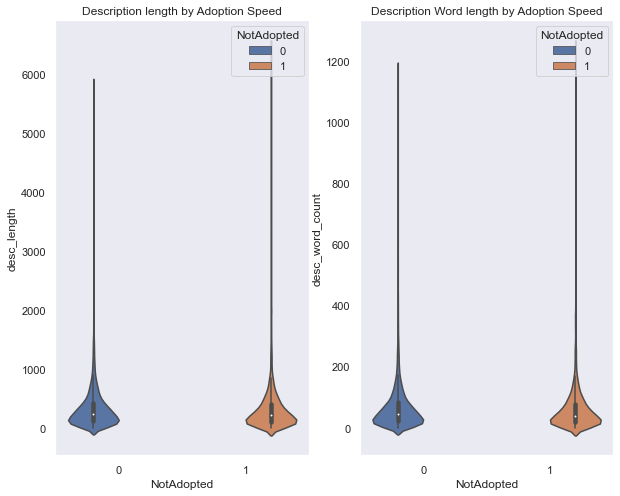

In [144]:
fig, axes = plt.subplots(1,2, figsize=(10,8))
sns.violinplot(data=pets_df, y='desc_length', x='NotAdopted', hue='NotAdopted', ax=axes[0])
axes[0].set_title('Description length by Adoption Speed')
sns.violinplot(data=pets_df, y='desc_word_count', x='NotAdopted', hue='NotAdopted', ax=axes[1])
axes[1].set_title('Description Word length by Adoption Speed')
plt.show()

In [145]:
pets_df.groupby('NotAdopted').describe()[['desc_length', 'desc_word_count']].T

NotAdopted                        0            1
desc_length     count  10796.000000  4197.000000
                mean     337.222768   307.157017
                std      362.809256   346.888457
                min        1.000000     1.000000
                25%      119.000000    99.000000
                50%      239.000000   210.000000
                75%      427.000000   398.000000
                max     5801.000000  6439.000000
desc_word_count count  10796.000000  4197.000000
                mean      65.193405    59.723136
                std       70.770266    67.329314
                min        0.000000     0.000000
                25%       22.000000    18.000000
                50%       46.000000    40.000000
                75%       83.000000    78.000000
                max     1173.000000  1243.000000

In [146]:
low_wc_profile = pets_df[pets_df['desc_word_count'] < 10]

In [147]:
print(f"The unadopted rate for profiles with less than 10 words is {low_wc_profile['NotAdopted'].mean():.2f}")

The unadopted rate for profiles with less than 10 words is 0.31


There is evidence that longer description leads to better adoption rate. Profiles that have less than 10 words have a lower adoption rate (31% are not adopted)

### Top words

In [148]:
def top_10_words(text, vectorizer, ngram):
    if vectorizer == 'count':
        vect = CountVectorizer(stop_words='english', ngram_range=(ngram,ngram))
    else:
        vect = TfidfVectorizer(stop_words='english', ngram_range=(ngram,ngram))
    text_vec = vect.fit_transform(text)
    text_df_vec = pd.DataFrame(text_vec.toarray(), columns=vect.get_feature_names())
    top_words = text_df_vec.sum().sort_values(ascending=False)
    plt.figure(figsize=(5,5))
    top_words[:10].plot(kind='barh')
    plt.title('Top 10 Words')
    plt.show()

In [149]:
pets_df_adopted = split_df(pets_df, 'NotAdopted')

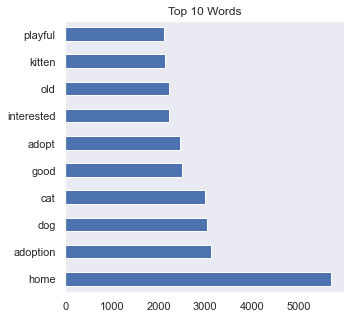

In [150]:
# top 10 words count vectorizer - adopted
top_10_words(pets_df_adopted[0]['Description'], 'count', 1)

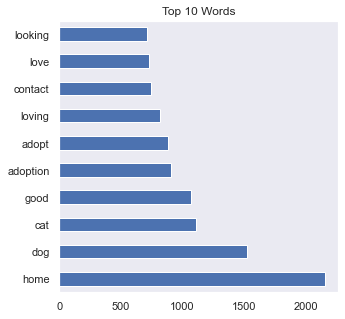

In [151]:
# top 10 words count vectorizer - not adopted
top_10_words(pets_df_adopted[1]['Description'], 'count', 1)

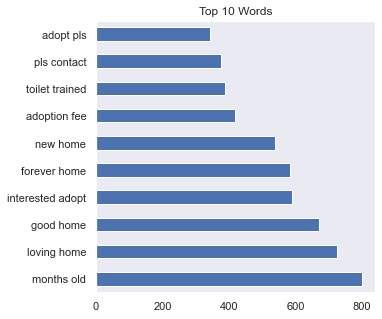

In [152]:
# top 10 words count vectorizer bigram - adopted
top_10_words(pets_df_adopted[0]['Description'], 'count', 2)

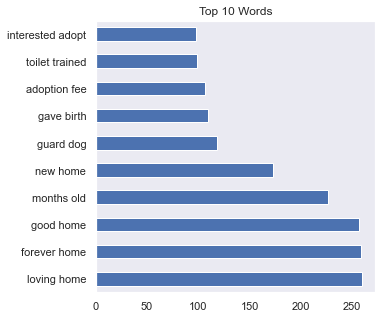

In [153]:
# top 10 words count vectorizer bigram - not adopted
top_10_words(pets_df_adopted[1]['Description'], 'count', 2)

There does not seem to be much difference in the most common words between those adopted and not adopted.

### Language

In [154]:
from langdetect import detect
import time

from googletrans import Translator
translator = Translator()


In [155]:
def detect_lang(text):
    try:
        lang = detect(text)
        return lang
    except:
        return 'error'

In [156]:
# identify languages of description
pets_df['lang'] = pets_df['Description'].progress_apply(detect_lang)

100%|██████████| 14993/14993 [01:25<00:00, 175.83it/s]


In [157]:
pets_df['lang'].value_counts()

en       14122
id         463
da         106
de          62
error       28
zh-cn       27
ro          24
no          23
fr          15
ko          14
es          13
af          10
tl          10
so           9
nl           8
ca           8
fi           8
cy           7
vi           6
sl           5
hr           5
it           4
sv           4
sk           3
tr           2
pt           2
et           2
sq           1
hu           1
sw           1
Name: lang, dtype: int64

In [158]:
pets_df[pets_df['lang']=='error']['Description'].sample(5)

8674      
2514      
1601     0
10014     
14809     
Name: Description, dtype: object

The rows with error are those rows that have no description

In [159]:
# Malay/Indonesian Description
pets_df[pets_df['lang']=='id']['Description'].sample(5)

611      Ditemui di sekitar pejabat di Bandar Baru Bang...
317      Lost and homeless Dah tiba musim membuang kuci...
12467    Area ALOR SETAR Domestic Short Hair Ibu kucing...
525      Saya ambil anak kucing terbiar ni di hadapan s...
37       si comel ini memerlukan seseorang yang boleh m...
Name: Description, dtype: object

In [160]:
pets_df[pets_df['lang']=='zh-cn']['Description'].sample(5)

13264    他是被丢在工业区的宝宝 这里两条街大概只狗狗 因为狗狗太多的关系已经惹得店家的厌恶 被报了两...
1974                                                   很活泼
7540     他是被丢在工业区的宝宝 这里两条街大概只狗狗 因为狗狗太多的关系已经惹得店家的厌恶 被报了两...
5280     流浪狗 因为没有可以收留她的地方 在外流浪经常被欺负虐待然后受伤 希望有能力的人可以收养她 ...
1002     小豹纹是一只两个月大的女生 她的性格非常活泼可爱 现在寻找一个有爱心 有耐心和有经济能力的有...
Name: Description, dtype: object

Since this dataset is from malaysia, we would expect some malay and mandarin text columns according to the popular languages in Malaysia. However, there seem to be a number of other languages, especially Danish and German, I will look into those to check if they have been classified correctly.

[source](https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes)

In [161]:
pets_df[pets_df['lang']=='da']['Description'].sample(5)

9968              Super friendly
6036              Dog 4 Adoption
334      Female dog for adoption
14335             Dog 4 Adoption
7042         Kitten for adoption
Name: Description, dtype: object

In [162]:
pets_df[pets_df['lang']=='de']['Description'].sample(5)

3627                                              Friendly
8086                                              Friendly
12873    Name Lingga Age 1 1 2 years Size Medium Gender...
10177                     6months old Poodle mix schnauzer
9108                                              Friendly
Name: Description, dtype: object

There are many text that are not labeled as English, Mandarin or Bahasa that are misclassified. This seem to occur when one of the words in the description is not in English or when the description is very short. To avoid the scenarios that the text are not in english, we will run a translator for the description column to convert all rows classified as non-english text to english

In [163]:
pets_df['english'] = pets_df['lang'].apply(lambda x: 1 if x in ['en', 'error'] else 0)

In [164]:
pets_df['english'].value_counts()

1    14150
0      843
Name: english, dtype: int64

There are about 843 rows where the description is not entirely in english

In [165]:
# create description copy to compare
pets_df['Description_copy'] = pets_df['Description']

In [166]:
def translate_lang(text):
    clean_text = translator.translate(text, dest='en').text
    time.sleep(np.random.randint(1,3))
    return clean_text

In [167]:
pets_df.loc[pets_df['english']==0, 'Description'] = pets_df.loc[pets_df['english']==0, 'Description'].progress_apply(translate_lang)

100%|██████████| 843/843 [28:16<00:00,  2.01s/it]


In [168]:
print(f"{pets_df[pets_df['Description'] != pets_df['Description_copy']].shape[0]} Descriptions were translated")

589 Descriptions were translated


## Image

In [169]:
# Import library to read images
import cv2

In [170]:
# Function to show images
def show_img(pet_id_list):
    fig, axes = plt.subplots(1, len(pet_id_list), figsize=(20,15))
    for i, pet_id in enumerate(pet_id_list):
        img_path = f"pet_images/{pet_id}-1.jpg"
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i].imshow(img)
        axes[i].grid(False)
        axes[i].axis('off')
    plt.show()

In [171]:
not_adopted_dog_sample = list(pets_df[(pets_df['NotAdopted'] == 1) & 
                                      (pets_df['PhotoAmt'] != 0) &
                                      (pets_df['Type'] == 'dog')]['PetID'].sample(5))
adopted_dog_sample = list(pets_df[(pets_df['NotAdopted'] == 0) &
                                  (pets_df['PhotoAmt'] != 0 &
                                  (pets_df['Type'] == 'dog'))]['PetID'].sample(5))

not_adopted_cat_sample = list(pets_df[(pets_df['NotAdopted'] == 1) & 
                                      (pets_df['PhotoAmt'] != 0) &
                                      (pets_df['Type'] == 'cat')]['PetID'].sample(5))
adopted_cat_sample = list(pets_df[(pets_df['NotAdopted'] == 0) &
                                  (pets_df['PhotoAmt'] != 0 &
                                  (pets_df['Type'] == 'cat'))]['PetID'].sample(5))

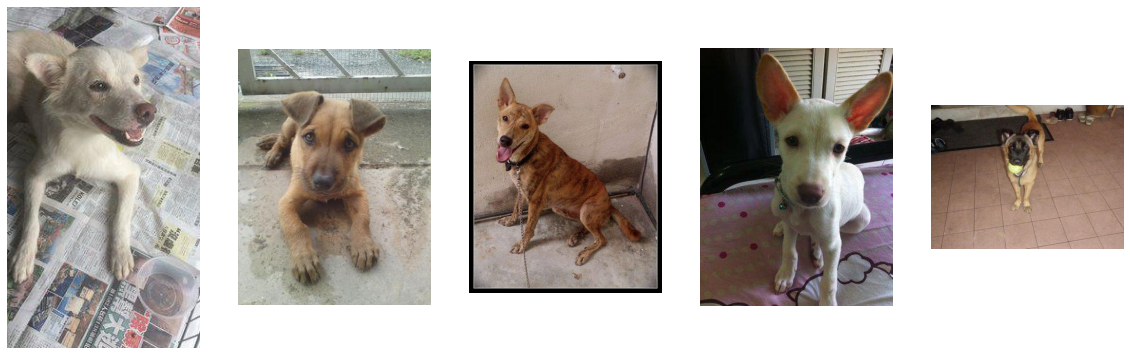

In [172]:
show_img(not_adopted_dog_sample)

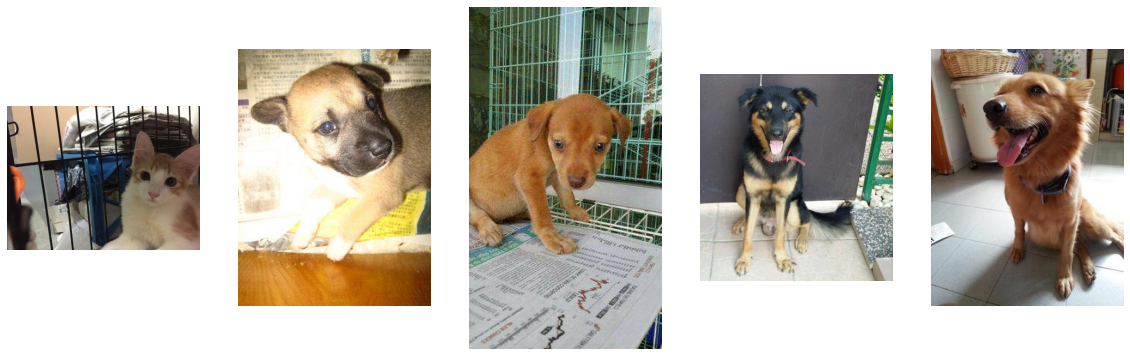

In [173]:
show_img(adopted_dog_sample)

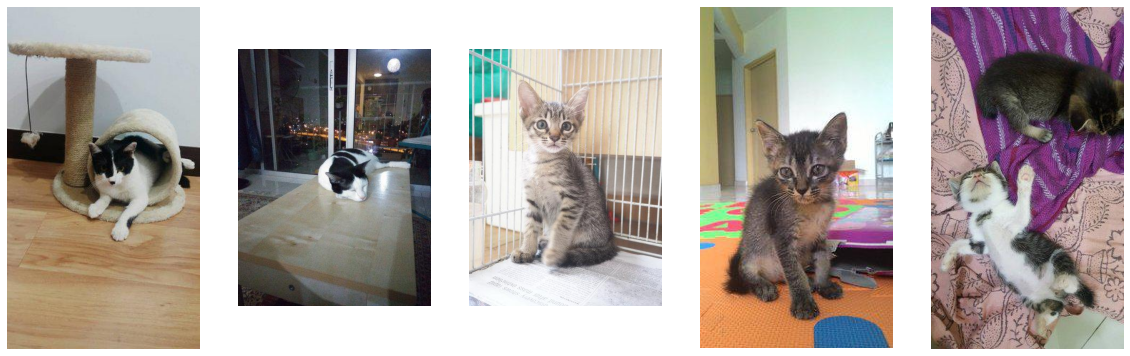

In [174]:
show_img(not_adopted_cat_sample)

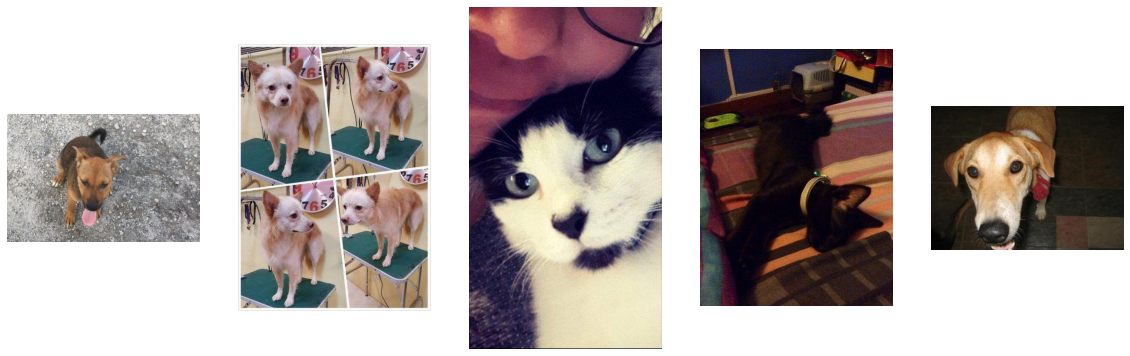

In [175]:
show_img(adopted_cat_sample)

There seem to be some inaccuracy as some listings of Cats have a profile picture of a dog and vice versa.

**Create seperate df for image**

In [176]:
image_df = pets_df[['PetID', 'PhotoAmt']].copy()

In [177]:
# enter image file path as the value
image_df['ProfilePic'] = image_df['PetID'].apply(lambda x: x + '-1' + '.jpg')

### Clean image directory

We will only keep the profile pic for each profile if they have an image

In [178]:
import os

In [179]:
profile_pic_df = image_df[image_df['PhotoAmt'] != 0]

In [180]:
os.chdir('C:\\Users\\cherw\\OneDrive\\data_science\\GA\\my_materials\\capstone\\petfinder-adoption-prediction\pet_images')

In [181]:
os.getcwd()

'C:\\Users\\cherw\\OneDrive\\data_science\\GA\\my_materials\\capstone\\petfinder-adoption-prediction\\pet_images'

In [182]:
profile_img = list(profile_pic_df['ProfilePic'])

In [183]:
for img in os.listdir():
    if img not in profile_img:
        os.remove(img)

In [184]:
os.chdir('C:\\Users\\cherw\\OneDrive\\data_science\\GA\\my_materials\\capstone\\petfinder-adoption-prediction')

In [185]:
os.getcwd()

'C:\\Users\\cherw\\OneDrive\\data_science\\GA\\my_materials\\capstone\\petfinder-adoption-prediction'

## Summary of EDA

In [186]:
# reorder columns for heatmap - put target variable at the end
col_reorder = ['Type', 'Age', 'Gender', 'Color1', 'MaturitySize',
               'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized',
               'Health', 'Quantity', 'Fee', 'State', 'Description',
               'PetID', 'PhotoAmt', 'BreedName', 'mixed_breed',
               'multi_color', 'FeeAsked', 'photo', 'desc_length',
               'desc_word_count', 'lang', 'english', 'Description_copy',
               'AdoptionSpeed', 'NotAdopted']
pets_df_hm = pets_df[col_reorder]

<AxesSubplot:>

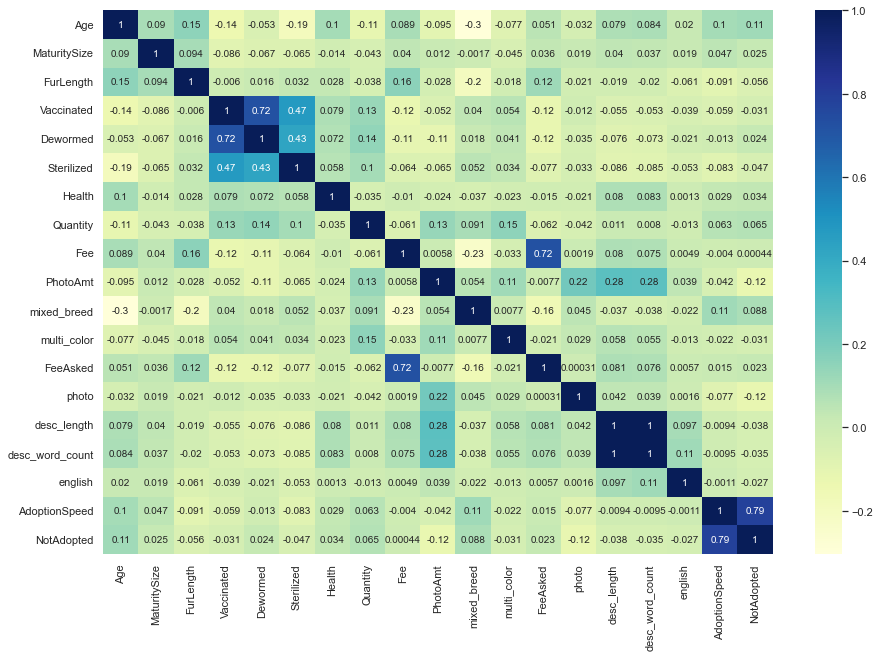

In [187]:
# plot correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(pets_df_hm.corr(), cmap="YlGnBu", annot=True)

- The features that have a higher correlation to the target variable are age, number of photos and presence of profile picture
- 27% of the pets do not get adopted (4197)
- Cats have a higher adoption rate as compared to dogs. About 30% of dogs are not adopted within a 100 days
- Most listed pets are very young, younger pets have a much higher rate of adoption
- Most Breeds are mixed breed(dogs) and domestic (cats) 
- Pure breed pets are more likely to get adopted
- Male have a slightly higher adoption rate than female
- Majority of the pets are black or brown in color
- Colors that are less common seem to have a higher adoption rate
- Multi-colored pets also seem to have a slightly better adoption rate (27% not adopted) compared to single colored pets (30% adopted)
- Medium size pets have the worst adoption rate (29% not adopted) while small pets have the best (25% not adopted)
- Most pets have short hair. Very few pets have long fur
- Pets with long fur have the highest adoption rate (16% not adopted) while pets with shorter fur have the lowest adoption rate (30% not adopted)
- Rarer traits seem to positively impact adoption outcome
- For Vaccination, Dewormed and sterilization, adopters tend to prefer pets that have not undergone any of the procedure - perhaps they want to do it themselves
- Not having information about these negatively impacts adoption outcome
- Adoption rates becomes worse as health deteriorates. Healthy pets have 28% unadopted while for pets with serious injury, 41% are not adopted
- When there is a high fee, pets are adopted faster, perhaps people are more inclined to pay for a more ‘desirable’ pet
- A small fee tends to make the pet less desirable
- Pets with no photo have a worse adoption rate (62% not adopted)
- A higher number of photos tend to lead to better adoption rate
- Most frequent words for adopted and non adopted profile does not seem to differ much
- Pets with longer Description in their profile have a slightly better adoption chance

## Export Data

### Image

In [188]:
image_df.to_csv("data/image_df.csv", index=False)

### Text

In [189]:
text_df = pets_df[['PetID', 'Description']].copy()

In [190]:
text_df.sample()

,PetID,Description
5557,6c8487ccb,We rescued 3 puppies at Bagan Ajam Market on S...


In [191]:
text_df.to_csv("data/text_df.csv", index=False)

### Tabular

In [192]:
pets_df.sample()

,Type,Age,Gender,Color1,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,Description,PetID,PhotoAmt,AdoptionSpeed,NotAdopted,BreedName,mixed_breed,multi_color,FeeAsked,photo,desc_length,desc_word_count,lang,english,Description_copy
8912,cat,12,male,Gray,1,1,3,3,3,2,1,0,Kuala Lumpur,kitten abandoned by mother cat,1ba539b66,1.0,3,0,British Shorthair,0,1,0,1,30,5,en,1,kitten abandoned by mother cat


In [193]:
cols_drop = ['Description', 'BreedName', 'Fee', 'lang', 'english', 'Description_copy']

In [194]:
tab_df = pets_df.drop(cols_drop, axis=1)

In [195]:
tab_df.to_csv("data/tab_df.csv", index=False)